<a href="https://colab.research.google.com/github/alonacode/AI/blob/main/My_DZ_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

* Завантажте дані
* Розділіть дані на тренувальні та тестові
* У `MyTokenizer` добавте обробку тексту за допомогою `nltk`, застосуйте **стематизацію**
* Застосуйте `TfidfVectorizer`
* Застосуйте `TruncatedSVD`
* Натренуйте модель [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="linear"`, якщо вистачить пам'яті можна спробувати `kernel="rbf"`
* Виведіть результати

# Дані про телеграм

In [31]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/telegram_spam.csv")

In [32]:
df

,text_type,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...
...,...,...
20343,ham,/ban
20344,ham,/ban
20345,ham,/ban
20346,ham,Kaisi hii


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


X = df['text']
y = df['text_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

In [34]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Завантажуємо необхідні ресурси

nltk.download('punkt_tab')
nltk.download('stopwords')


class MyTokenizer:
    def __init__(self):
        self.stemmer = PorterStemmer()
        self.stop_words = set(stopwords.words('english'))

    def __call__(self, text):
        tokens = word_tokenize(text.lower())  # Токенізуємо текст
        # Видаляємо тільки стоп-слова
        filtered_tokens = [token for token in tokens if token not in self.stop_words]
        # Стематизуємо слова
        stemmed = [self.stemmer.stem(token) for token in filtered_tokens]
        return stemmed

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
tokenizer = MyTokenizer()
tfidf = TfidfVectorizer(tokenizer=tokenizer, max_features=5_000)
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [36]:
X_train

<16278x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 384734 stored elements in Compressed Sparse Row format>

In [37]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(1914+1)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [38]:
pca.explained_variance_ratio_.sum()

0.8593841330352195

In [39]:
pca.explained_variance_ratio_.cumsum()

array([0.02280255, 0.03397166, 0.0409111 , ..., 0.85916382, 0.85927406,
       0.85938413])

In [40]:
import numpy as np

np.where(pca.explained_variance_ratio_.cumsum() >= 0.86)

(array([], dtype=int64),)

In [41]:
from sklearn.svm import SVC

model = SVC(kernel="linear")

model.fit(X_train, y_train)
model

SVC(kernel='linear')

In [42]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.95      0.97      0.96      2868
        spam       0.92      0.88      0.90      1202

    accuracy                           0.94      4070
   macro avg       0.93      0.92      0.93      4070
weighted avg       0.94      0.94      0.94      4070



[]

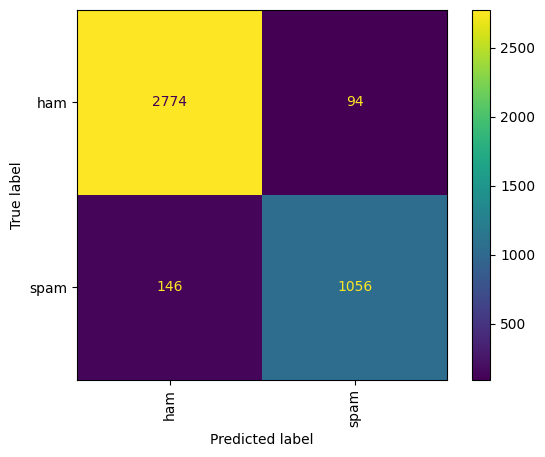

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()

In [45]:
from sklearn.pipeline import Pipeline

final_model = Pipeline(steps=[
    ('vectorizer', tfidf),
    ('pca', pca),
    ('model', model)
])

final_model


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=5000,
                                 tokenizer=<__main__.MyTokenizer object at 0x7b23fdc25870>)),
                ('pca', TruncatedSVD(n_components=1915)),
                ('model', SVC(kernel='linear'))])